### GenAi internship

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt

### Load the Csv file

In [3]:
orders = pd.read_csv("orders.csv")

In [4]:
orders

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian


### Load the json file

In [5]:
users = pd.read_json("users.json")

In [6]:
users

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


### Load the Sql File

In [7]:
conn = sqlite3.connect(":memory:")

In [8]:
with open("restaurants.sql", "r") as f:
    conn.executescript(f.read())

In [9]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)

In [11]:
restaurants

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8
...,...,...,...,...
495,496,Restaurant_496,Indian,3.1
496,497,Restaurant_497,Mexican,4.4
497,498,Restaurant_498,Chinese,3.9
498,499,Restaurant_499,Mexican,4.9


### Merge the Data

### Perform joins using keys:
- orders.user_id → users.user_id
- orders.restaurant_id → restaurants.restaurant_id
- Join Type: Left Join (to retain all orders)

In [12]:
merged_df = orders.merge(
    users,
    on="user_id",
    how="left"
)

In [13]:
merged_df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular
...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold


In [14]:
final_df = merged_df.merge(
    restaurants,
    on="restaurant_id",
    how="left"
)

In [15]:
final_df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


In [78]:
final_df.shape[0]

10000

In [16]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

### Load the Final Data Set

In [75]:
data = pd.read_csv("final_food_delivery_dataset.csv")

In [76]:
data

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


### Information About the Data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


### Check the null and Duplicated

In [20]:
data.isnull().sum()

order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64

In [22]:
data.duplicated().sum()

np.int64(0)

### Check for Outliers

<Axes: >

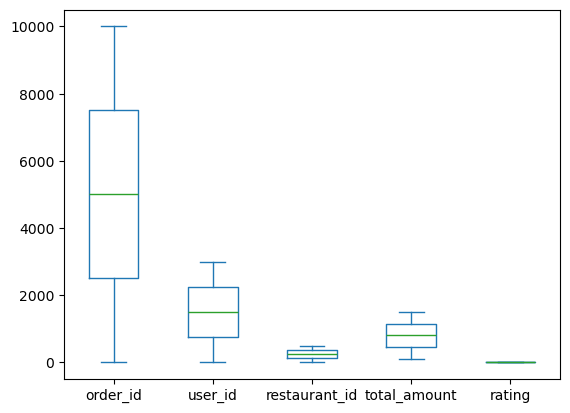

In [23]:
data.plot(kind = 'box')

#### 1.Which city has the highest total revenue (total_amount) from Gold members? 

In [24]:
gold = data[data["membership"] == "Gold"]

In [31]:
gold.groupby("city")["total_amount"].sum().reset_index().sort_values(by="total_amount", ascending=False)

,city,total_amount
1,Chennai,1080909.79
3,Pune,1003012.32
0,Bangalore,994702.59
2,Hyderabad,896740.19


#### 2.Which cuisine has the highest average order value across all orders?

In [29]:
data.groupby("cuisine")["total_amount"].mean().reset_index().sort_values(by="total_amount", ascending=False)

,cuisine,total_amount
3,Mexican,808.021344
2,Italian,799.448578
1,Indian,798.466011
0,Chinese,798.389020


#### 3.How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?

In [39]:
sum1 = data.groupby("user_id")["total_amount"].sum() > 1000

In [41]:
sum1.sum()

np.int64(2544)

#### 4.Which restaurant rating range generated the highest total revenue?

In [43]:
import warnings
warnings.filterwarnings('ignore')
data.groupby(pd.cut(data["rating"], [0,3.5,4.0,4.5,5.0], labels=["3.0–3.5","3.6–4.0","4.1–4.5","4.6–5.0"]))["total_amount"].sum().idxmax()

'4.6–5.0'

#### 5.Among Gold members, which city has the highest average order value?

In [47]:
data[data["membership"]=="Gold"].groupby("city")["total_amount"].mean().idxmax()

'Chennai'

#### 6.Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?

In [49]:
data.groupby("cuisine").agg(restaurants=("restaurant_id","nunique"), revenue=("total_amount","sum")).sort_values("restaurants").iloc[0]

restaurants        120.00
revenue        1930504.65
Name: Chinese, dtype: float64

#### 7.What percentage of total orders were placed by Gold members? (Rounded to nearest integer)

In [55]:
round((data["membership"]=="Gold").mean() * 100)

50

#### 8.Which restaurant has the highest average order value but less than 20 total orders?

In [57]:
data.groupby("restaurant_name_x").filter(lambda x: len(x) < 20).groupby("restaurant_name_x")["total_amount"].mean().idxmax()

'Hotel Dhaba Multicuisine'

#### 9.Which combination contributes the highest revenue?

In [61]:
data.groupby(["membership","cuisine"])["total_amount"].sum().idxmax()

('Regular', 'Mexican')

In [62]:
data['cuisine'].value_counts()

cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: count, dtype: int64

#### 10.During which quarter of the year is the total revenue highest?

In [65]:
data["order_date"] = pd.to_datetime(data["order_date"], dayfirst=True)
data.groupby(data["order_date"].dt.quarter)["total_amount"].sum().idxmax()

np.int32(3)

### Fill in the BLanks

#### 11.How many total orders were placed by users with Gold membership?

In [67]:
data[data["membership"]=="Gold"].shape

(4987, 12)

#### 12.What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?

In [69]:
round(data[data["city"]=="Hyderabad"]["total_amount"].sum())

1889367

#### 13.How many distinct users placed at least one order?

In [70]:
data["user_id"].nunique()

2883

#### 14.What is the average order value (rounded to 2 decimals) for Gold members?

In [71]:
round(data[data["membership"]=="Gold"]["total_amount"].mean(), 2)

np.float64(797.15)

#### 15.How many orders were placed for restaurants with rating ≥ 4.5?

In [72]:
data[data["rating"] >= 4.5].shape[0]

3374

#### 16.How many orders were placed in the top revenue city among Gold members only?

In [73]:
data[(data["membership"]=="Gold") & (data["city"]==data[data["membership"]=="Gold"].groupby("city")["total_amount"].sum().idxmax())].shape[0]

1337

In [77]:
data.shape[0]

10000